세번째 작업 - total train 얻기

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
# 일관성 유지, 대부분의 데이터 분석 도구는 YYYY-MM-DD 형식으로 표시된 날짜를 지원, 데이터 분석을 보다 쉽게 수행할 수 있도록 하는 것
date_parsering = lambda date: pd.to_datetime(date, format='%d.%m.%Y')

train = pd.read_csv('../data/sales_train.csv', parse_dates=['date'], date_parser=date_parsering)

In [15]:
print(train.isnull().sum())

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [16]:
print(f"중복 제거: {train.duplicated().sum()}개 ")
train = train.drop_duplicates()
train.head()

중복 제거: 6개 


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


<AxesSubplot:xlabel='item_price'>

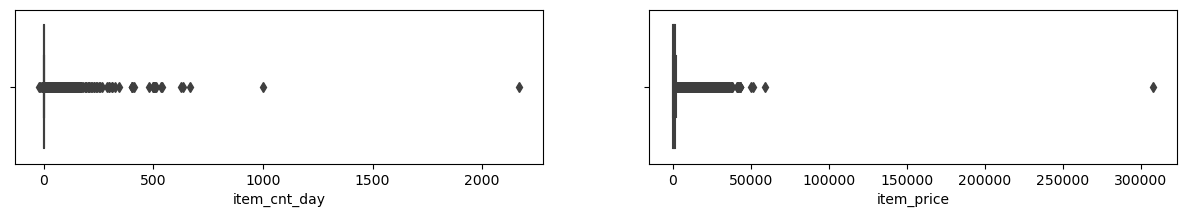

In [17]:
fig, axes = plt.subplots(1,2, figsize = (15,2))
sns.boxplot(x=train.item_cnt_day, ax=axes[0])
sns.boxplot(x=train.item_price, ax=axes[1])

In [18]:
train = train[train['item_cnt_day'] < 1000]
train = train[train['item_price'] < 300000]

<AxesSubplot:xlabel='item_price'>

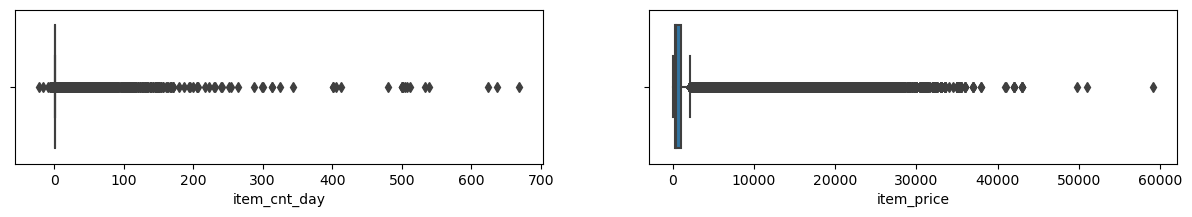

In [19]:
fig, axes = plt.subplots(1,2, figsize = (15,2))
sns.boxplot(x=train.item_cnt_day, ax=axes[0])
sns.boxplot(x=train.item_price, ax=axes[1])

In [20]:
train[train['item_price'] == -1]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [21]:
train[train['item_id'] == 2973].head(5)
# shop_id 32만 해당

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352,2013-01-15,0,25,2973,2499.0,13.0
353,2013-01-16,0,25,2973,2499.0,5.0
354,2013-01-17,0,25,2973,2499.0,3.0
355,2013-01-18,0,25,2973,2499.0,2.0
356,2013-01-19,0,25,2973,2499.0,3.0


In [22]:
price_trans = train[(train['shop_id'] == 32) & (train['item_id'] == 2973) & (train['date_block_num'] == 4) & (train['item_price'] > 0)].item_price.median()
train.loc[train['item_price'] < 0, 'item_price'] = price_trans
train[train['item_price'] == -1]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


In [23]:
# shop_id와 shop_name 0을 57에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(0, 57)

# shop_id와 shop_name 1을 58에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(1, 58)

# shop_id와 shop_name 11을 10에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(11, 10)

# shop_id와 shop_name 40을 39에 맞춰 변경
train['shop_id'] = train['shop_id'].replace(40, 39)

In [24]:
pre_train = train.drop_duplicates()

In [25]:
pre_train['shop_id'].nunique()

56

In [26]:
pre_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [27]:
pre_train.to_csv("../pre_data/pre_train.csv")